<h2 Exploratory Data Analysis</h2>

In [1]:
import pandas as pd
import numpy as np
path='Processed_data.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,horsepower-binned,diesel,gas,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,16500,11.190476,Low,0,1,1,0
1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,16500,12.368421,Medium,0,1,1,0
2,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,13950,9.791667,Low,0,1,1,0
3,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,17450,13.055556,Low,0,1,1,0
4,2,161.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,25,15250,12.368421,Low,0,1,1,0


<h2 id="pattern_visualization">Analyzing Individual Feature Patterns using Visualization</h2>

To install seaborn use the pip which is the python package manager.<p>
Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [2]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with.This helps to find the right visualization method for that variable.</p>


In [3]:
print(df.dtypes)

symboling              int64
normalized_losses    float64
make                  object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                  int64
city_L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
aspiration_std         int64
aspiration_turbo       int64
dtype: object


Calculate the correlation between variables  of type "int64" or "float64" using the method "corr":

In [4]:
df.corr()

C:\Users\sumuk\AppData\Local\Temp\ipykernel_13508\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas,aspiration_std,aspiration_turbo
symboling,1.000000,0.457358,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.160960,0.009373,...,0.074581,0.284011,-0.030158,0.041248,-0.083327,0.062423,-0.195381,0.195381,0.050995,-0.050995
normalized_losses,0.457358,1.000000,-0.010841,0.085315,0.139347,-0.368904,0.178748,0.215872,0.021578,0.096816,...,0.315811,0.225814,-0.299811,-0.255678,0.250220,0.333324,-0.129932,0.129932,0.005505,-0.005505
wheel_base,-0.529145,-0.010841,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.505818,0.144292,...,0.375732,-0.364971,-0.480029,-0.552211,0.589147,0.484047,0.306706,-0.306706,-0.254907,0.254907
length,-0.364511,0.085315,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.613415,0.120611,...,0.580477,-0.286754,-0.667658,-0.700186,0.691044,0.659174,0.210616,-0.210616,-0.229294,0.229294
width,-0.237262,0.139347,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548247,0.182792,...,0.617032,-0.247388,-0.638155,-0.684700,0.752795,0.677111,0.243448,-0.243448,-0.304459,0.304459
height,-0.542261,-0.368904,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.202897,-0.082394,...,-0.085725,-0.315756,-0.057087,-0.111568,0.137284,0.008923,0.281198,-0.281198,-0.086531,0.086531
curb_weight,-0.234743,0.178748,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.645765,0.168459,...,0.758095,-0.279411,-0.750390,-0.795515,0.834420,0.785868,0.221082,-0.221082,-0.322097,0.322097
engine_size,-0.112069,0.215872,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.583362,0.207154,...,0.822656,-0.256702,-0.651002,-0.679877,0.872337,0.745337,0.070925,-0.070925,-0.110278,0.110278
bore,-0.160960,0.021578,0.505818,0.613415,0.548247,0.202897,0.645765,0.583362,1.000000,-0.051271,...,0.564108,-0.282980,-0.568450,-0.579478,0.542574,0.538504,0.058243,-0.058243,-0.233044,0.233044
stroke,0.009373,0.096816,0.144292,0.120611,0.182792,-0.082394,0.168459,0.207154,-0.051271,1.000000,...,0.100456,-0.064977,-0.041530,-0.041014,0.083280,0.042519,0.239794,-0.239794,-0.215453,0.215453


In [6]:
df[['bore','stroke','compression_ratio','horsepower']].corr()

,bore,stroke,compression_ratio,horsepower
bore,1.000000,-0.051271,0.003736,0.564108
stroke,-0.051271,1.000000,0.186634,0.100456
compression_ratio,0.003736,0.186634,1.000000,-0.214162
horsepower,0.564108,0.100456,-0.214162,1.000000


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". 

<p>In order to start understanding the (linear) relationship between an individual variable and the price. This can be done by using "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>

<h4>Positive linear relationship</h4>

Scatterplot of "engine-size" and "price" 

(0.0, 53488.290792708656)

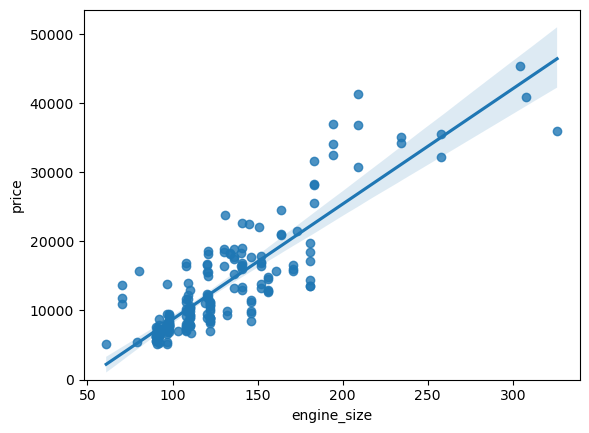

In [7]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine_size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87

In [8]:
df[["engine_size", "price"]].corr()

,engine_size,price
engine_size,1.000000,0.872337
price,0.872337,1.000000


Thus, Highway mpg is a potential predictor variable of price 

<Axes: xlabel='highway_mpg', ylabel='price'>

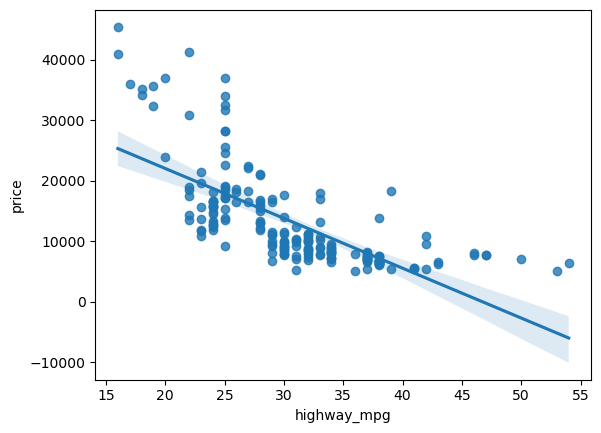

In [10]:
sns.regplot(x="highway_mpg", y="price", data=df)

<p>As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.705


In [11]:
df[['highway_mpg', 'price']].corr()

,highway_mpg,price
highway_mpg,1.000000,-0.705115
price,-0.705115,1.000000


<h3>Weak Linear Relationship</h3>

Let's see if "Peak-rpm" as a predictor variable of "price".

<Axes: xlabel='peak_rpm', ylabel='price'>

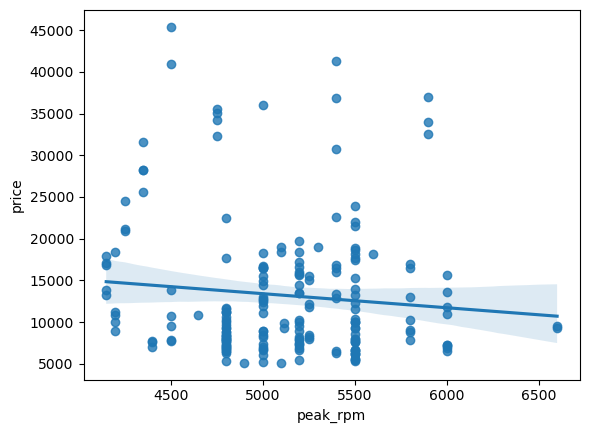

In [12]:
sns.regplot(x="peak_rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.1015

In [13]:
df[['peak_rpm','price']].corr()

,peak_rpm,price
peak_rpm,1.000000,-0.101519
price,-0.101519,1.000000


In [14]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08328
price,0.08328,1.00000


<Axes: xlabel='stroke', ylabel='price'>

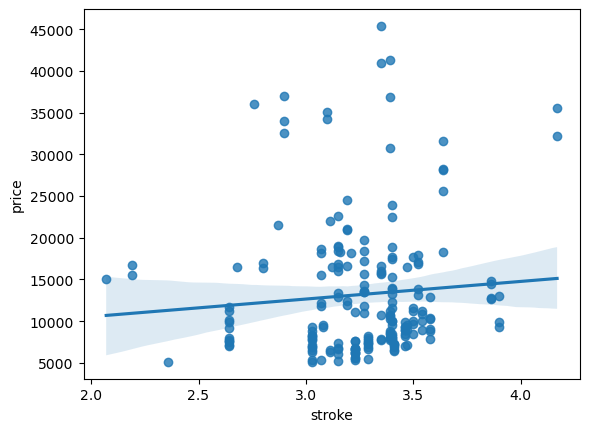

In [15]:
sns.regplot(x="stroke", y="price", data=df)

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

Relationship between "body-style" and "price"

<Axes: xlabel='body_style', ylabel='price'>

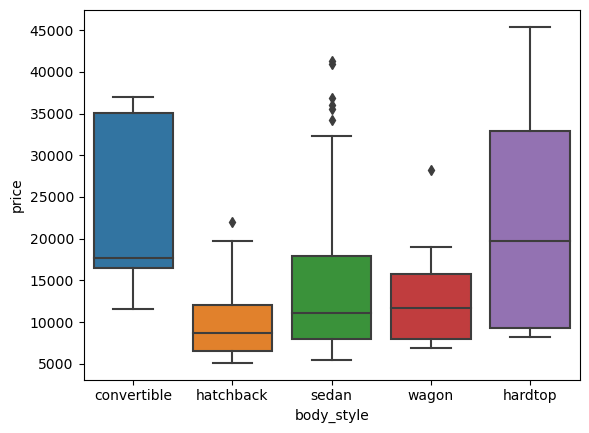

In [16]:
sns.boxplot(x="body_style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>

<Axes: xlabel='engine_location', ylabel='price'>

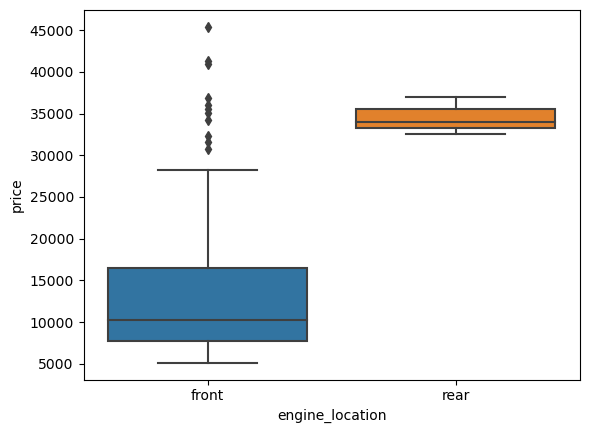

In [17]:
sns.boxplot(x="engine_location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>

Relationship between "drive-wheels" and "price".

<Axes: xlabel='drive_wheels', ylabel='price'>

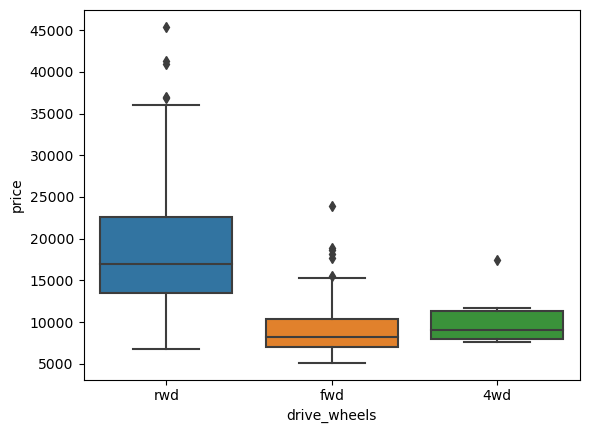

In [18]:

sns.boxplot(x="drive_wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>

<h2 id="discriptive_statistics">Descriptive Statistical Analysis</h2>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [19]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas,aspiration_std,aspiration_turbo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,124.065000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.32760,3.26005,...,103.355000,5118.181818,25.200000,30.705000,13205.690000,9.937914,0.100000,0.900000,0.820000,0.180000
std,1.248557,33.987446,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.26909,0.31418,...,37.455487,479.240110,6.432487,6.827227,7966.982558,2.539415,0.300753,0.300753,0.385152,0.385152
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.54000,2.07000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,97.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.15000,3.11750,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.31000,3.29000,...,95.000000,5159.090909,24.000000,30.000000,10270.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,150.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.58250,3.41000,...,116.000000,5500.000000,30.000000,34.000000,16500.750000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.94000,4.17000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [20]:
df.describe(include=['object'])

,make,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,horsepower-binned
count,200,200,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,197,145,156,91,152


<h3>Value Counts</h3>

<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".</p>

In [23]:
df['drive_wheels'].value_counts()

fwd    118
rwd     74
4wd      8
Name: drive_wheels, dtype: int64

We can convert the series to a Dataframe as follows :

In [24]:
df['drive_wheels'].value_counts().to_frame()

,drive_wheels
fwd,118
rwd,74
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.

In [25]:
drive_wheels_counts = df['drive_wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive_wheels':'value_counts'},inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,74
4wd,8


 Now let's rename the index to 'drive-wheels':

In [26]:
drive_wheels_counts.index.name = "drive_wheels"
drive_wheels_counts

,value_counts
drive_wheels,
fwd,118
rwd,74
4wd,8


We can repeat the above process for the variable 'engine-location'.

In [27]:
engine_loc_counts = df['engine_location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine_location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine_location'
engine_loc_counts.head(10)

,value_counts
engine_location,
front,197
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<h2 id="basic_grouping"> Basics of Grouping</h2>

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>

In [28]:
df['drive_wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>

In [30]:
df_group_one = df[['drive_wheels','body_style','price']]

We can then calculate the average price for each of the different categories of data.

In [31]:
# grouping results
df_group_one = df_group_one.groupby(['drive_wheels'],as_index=False).mean()
df_group_one

C:\Users\sumuk\AppData\Local\Temp\ipykernel_13508\1752571012.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive_wheels'],as_index=False).mean()


,drive_wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19842.243243


<p>From our data, it seems that <b>rear-wheel drive vehicles</b> are on average, the <b>most expensive</b>, whereas <b>4-wheel and front-wheel</b> are <b>approximately the same in price</b> </p>

<p>Grouping with multiple variables.
 Let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>

In [32]:
# grouping results
df_gptest = df[['drive_wheels','body_style','price']]
grouped_test1 = df_gptest.groupby(['drive_wheels','body_style'],as_index=False).mean()
grouped_test1

,drive_wheels,body_style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:</p>

In [33]:
grouped_pivot = grouped_test1.pivot(index='drive_wheels',columns='body_style')
grouped_pivot

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>

In [34]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [37]:
# Write your code below and press Shift+Enter to execute 
df_gptest2 = df[['body_style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body_style'],as_index=False).mean()
grouped_test_bodystyle

,body_style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs Price</h4>

Let's use a heat map to visualize the relationship between Body Style vs Price.

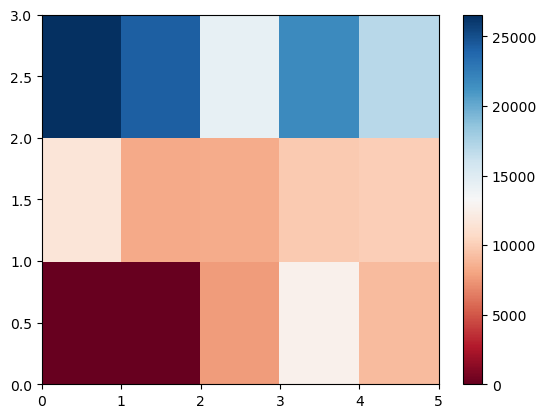

In [39]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>

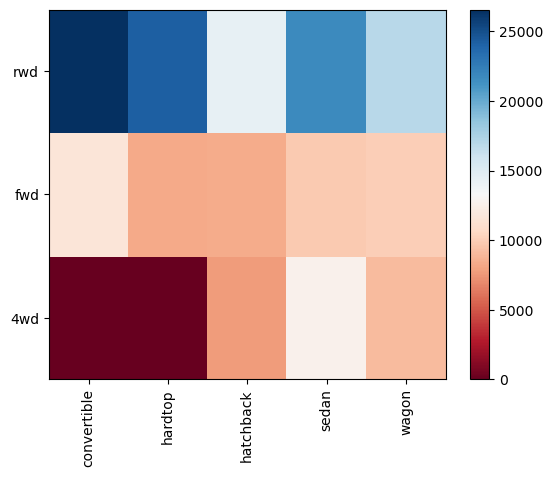

In [40]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?</p>

<h2 id="correlation_causation">Correlation and Causation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>

In [41]:
df.corr()

C:\Users\sumuk\AppData\Local\Temp\ipykernel_13508\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas,aspiration_std,aspiration_turbo
symboling,1.000000,0.457358,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.160960,0.009373,...,0.074581,0.284011,-0.030158,0.041248,-0.083327,0.062423,-0.195381,0.195381,0.050995,-0.050995
normalized_losses,0.457358,1.000000,-0.010841,0.085315,0.139347,-0.368904,0.178748,0.215872,0.021578,0.096816,...,0.315811,0.225814,-0.299811,-0.255678,0.250220,0.333324,-0.129932,0.129932,0.005505,-0.005505
wheel_base,-0.529145,-0.010841,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.505818,0.144292,...,0.375732,-0.364971,-0.480029,-0.552211,0.589147,0.484047,0.306706,-0.306706,-0.254907,0.254907
length,-0.364511,0.085315,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.613415,0.120611,...,0.580477,-0.286754,-0.667658,-0.700186,0.691044,0.659174,0.210616,-0.210616,-0.229294,0.229294
width,-0.237262,0.139347,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548247,0.182792,...,0.617032,-0.247388,-0.638155,-0.684700,0.752795,0.677111,0.243448,-0.243448,-0.304459,0.304459
height,-0.542261,-0.368904,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.202897,-0.082394,...,-0.085725,-0.315756,-0.057087,-0.111568,0.137284,0.008923,0.281198,-0.281198,-0.086531,0.086531
curb_weight,-0.234743,0.178748,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.645765,0.168459,...,0.758095,-0.279411,-0.750390,-0.795515,0.834420,0.785868,0.221082,-0.221082,-0.322097,0.322097
engine_size,-0.112069,0.215872,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.583362,0.207154,...,0.822656,-0.256702,-0.651002,-0.679877,0.872337,0.745337,0.070925,-0.070925,-0.110278,0.110278
bore,-0.160960,0.021578,0.505818,0.613415,0.548247,0.202897,0.645765,0.583362,1.000000,-0.051271,...,0.564108,-0.282980,-0.568450,-0.579478,0.542574,0.538504,0.058243,-0.058243,-0.233044,0.233044
stroke,0.009373,0.096816,0.144292,0.120611,0.182792,-0.082394,0.168459,0.207154,-0.051271,1.000000,...,0.100456,-0.064977,-0.041530,-0.041014,0.083280,0.042519,0.239794,-0.239794,-0.215453,0.215453


 sometimes we would like to know the significant of the correlation estimate. 

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is < 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is < 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is < 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is > 0.1: there is no evidence that the correlation is significant.</li>
</ul>

 We can obtain this information using  "stats" module in the "scipy"  library.

In [45]:
from scipy import stats

<h3>Wheel-base vs Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [46]:
pearson_coef, p_value = stats.pearsonr(df['wheel_base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.4570195020504053e-20


<h5>Conclusion:</h5>
<p>Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

<h3>Horsepower vs Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [39]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.36905742825998e-48


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

<h3>Length vs Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [47]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6910440897821903  with a P-value of P =  9.96096322234889e-30


<h5>Conclusion:</h5>
<p>Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h3>Width vs Price</h3>

 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [48]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.752794863183261  with a P-value of P = 8.25671414830845e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-weight vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [49]:
pearson_coef, p_value = stats.pearsonr(df['curb_weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344204348498461  with a P-value of P =  3.9699775360220333e-53


<h5>Conclusion:</h5>
<p>Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

<h3>Engine-size vs Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [50]:
pearson_coef, p_value = stats.pearsonr(df['engine_size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521142  with a P-value of P = 1.8977171466563487e-63


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

<h3>Bore vs Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [51]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5425744551462304  with a P-value of P =   1.0510641423150853e-16


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.541).</p>

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

<h3>City-mpg vs Price</h3>

In [52]:
pearson_coef, p_value = stats.pearsonr(df['city_mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862686  with a P-value of P =  2.729256568479228e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

<h3>Highway-mpg vs Price</h3>

In [53]:
pearson_coef, p_value = stats.pearsonr(df['highway_mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7051147088046402  with a P-value of P =  2.197326053158553e-31


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

<h2 id="anova"> ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<h3>Drive Wheels</h3>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>

In [55]:
grouped_test2=df_gptest[['drive_wheels', 'price']].groupby(['drive_wheels'])
grouped_test2.head(2)

,drive_wheels,price
0,rwd,16500
1,rwd,16500
2,fwd,13950
3,4wd,17450
4,fwd,15250
135,4wd,7603


In [56]:
df_gptest

,drive_wheels,body_style,price
0,rwd,convertible,16500
1,rwd,hatchback,16500
2,fwd,sedan,13950
3,4wd,sedan,17450
4,fwd,sedan,15250
...,...,...,...
195,rwd,sedan,16845
196,rwd,sedan,19045
197,rwd,sedan,21485
198,rwd,sedan,22470


 We can obtain the values of the method group using the method "get_group".  

In [57]:
grouped_test2.get_group('4wd')['price']

3      17450
135     7603
139     9233
140    11259
143     8013
144    11694
149     7898
150     8778
Name: price, dtype: int64

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [58]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 68.49603532807176 , P = 2.6116313994533863e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

#### Separately: fwd and rwd

In [59]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 131.59324661179534 , P = 1.7388247444783448e-23


 Let's examine the other groups 

#### 4wd and rwd

In [60]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.67069478113451 , P = 0.004232262975461328


<h4>4wd and fwd</h4>

In [61]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>